In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
df = pd.read_csv("data/car-features-msrp.csv")

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
# renaming columns name by make it consistent col_name
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [8]:
# renaming columns values to make it consistent & uniform i.e. ALL --> all
# extract text features
categorical_features = df.select_dtypes(exclude=np.number).columns
print(categorical_features)

Index(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style'],
      dtype='object')


In [9]:
for col in categorical_features:
    df[col] = df[col].str.lower() #.str.replace(' ', '_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1 series m,2011,premium unleaded (required),335.0,6.0,manual,rear wheel drive,2.0,"factory tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1 series,2011,premium unleaded (required),300.0,6.0,manual,rear wheel drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1 series,2011,premium unleaded (required),230.0,6.0,manual,rear wheel drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [15]:
# columns unique values & how many ()
for col in df.columns:
    print(col)
    print(f'unique values # {df[col].nunique()}') # how many unique values
    print(f'values {sorted(df[col].unique()[:5])}') # first 5 unique sorted values
    print('\n')

make
unique values # 48
values ['audi', 'bmw', 'chrysler', 'fiat', 'mercedes-benz']


model
unique values # 914
values ['1 series', '1 series m', '100', '124 spider', '190-class']


year
unique values # 28
values [1992, 1993, 2011, 2012, 2013]


engine_fuel_type
unique values # 10
values ['diesel', 'flex-fuel (unleaded/e85)', 'premium unleaded (recommended)', 'premium unleaded (required)', 'regular unleaded']


engine_hp
unique values # 356
values [172.0, 230.0, 300.0, 320.0, 335.0]


engine_cylinders
unique values # 9
values [4.0, 5.0, 6.0, 8.0, 12.0]


transmission_type
unique values # 5
values ['automated_manual', 'automatic', 'direct_drive', 'manual', 'unknown']


driven_wheels
unique values # 4
values ['all wheel drive', 'four wheel drive', 'front wheel drive', 'rear wheel drive']


number_of_doors
unique values # 3
values [2.0, 3.0, 4.0, nan]


market_category
unique values # 71
values ['factory tuner,luxury,high-performance', 'luxury', 'luxury,high-performance', 'luxury,performa

<AxesSubplot:xlabel='msrp', ylabel='Count'>

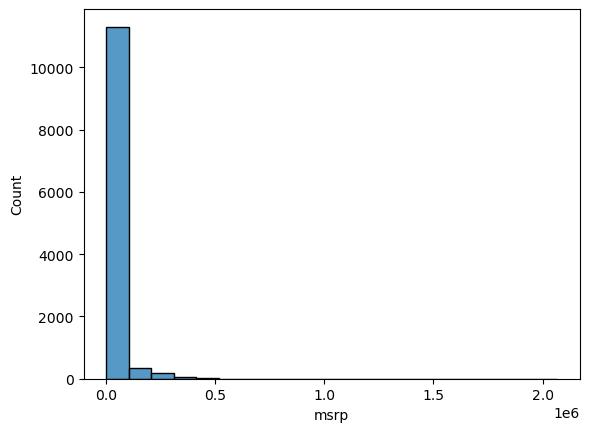

In [18]:
# distribution of prices (target)
sns.histplot(data=df, x='msrp', bins=20)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

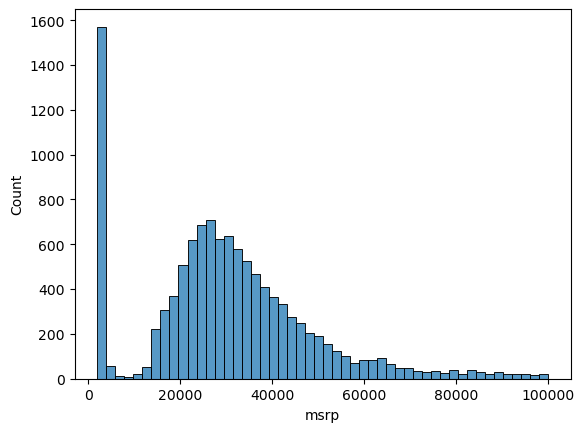

In [28]:
sns.histplot(data=df.msrp[df.msrp <= 100000], bins=50) # x=df.msrp,

In [12]:
# apply logarithm transformation to price
df['price_log'] = np.log1p(df['msrp'])

In [18]:
sorted(df['price_log'].unique(), reverse=True)[:5]

[14.54107797693027,
 14.349527179656565,
 14.220976332738882,
 14.139585551053191,
 14.137594781770806]

<AxesSubplot:xlabel='price_log', ylabel='Count'>

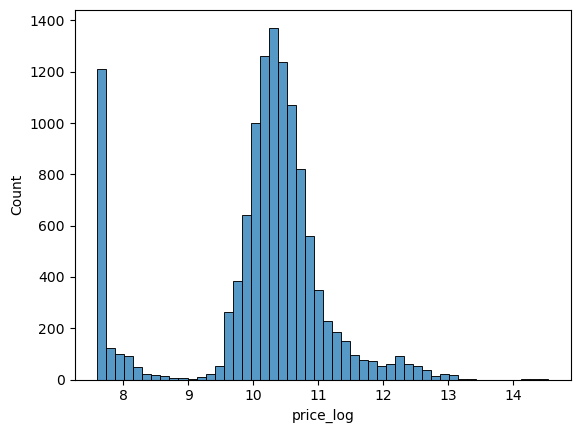

In [19]:
sns.histplot(data=df.price_log, bins=50)

In [22]:
# how many null values for each variable
df.isnull().sum().sort_values(ascending=False)

market_category      3742
engine_hp              69
engine_cylinders       30
number_of_doors         6
engine_fuel_type        3
vehicle_style           0
msrp                    0
popularity              0
city_mpg                0
highway_mpg             0
make                    0
vehicle_size            0
model                   0
driven_wheels           0
transmission_type       0
year                    0
price_log               0
dtype: int64

### Setting Up The Validation Framework

In [24]:
np.random.seed(2)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [25]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [26]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'price_log'],
      dtype='object')

In [27]:
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

### Linear Regression

In [28]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom drophead coupe
year                                        2015
engine_fuel_type     premium unleaded (required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
price_log                              13.081075
Name: 7557, dtype: object

In [33]:
xi = [453, 11, 86]

In [37]:
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [45]:
def lin_reg(xi):
    pred = w0
    n = len(xi)
    
    for j in range(n):
        pred += w[j] * xi[j]
    
    return np.expm1(pred).round(2)

In [46]:
lin_reg(xi)

222347.22

### Linear Regression - Vector Form

In [53]:
w_new = [w0] + w

In [61]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [62]:
def lin_reg_vec(xi):
    xi_new = [1] + xi
    return np.expm1(np.dot(xi_new, w_new)).round(2)

In [63]:
lin_reg_vec(xi)

222347.22

In [68]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [69]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = np.array([x1, x2, x10])
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [73]:
def lin_reg_mat(X):
    return np.expm1(X.dot(w_new)).round(2)

In [75]:
lin_reg_mat(X)

array([237992.82, 768348.51, 222347.22])

### Training Linear Regression - Normal Equation

In [83]:
X = np.array( [
    [1, 148, 24, 1385], 
    [1, 132, 25, 2031], 
    [1, 453, 11, 86], 
    [1, 158, 24, 185], 
    [1, 172, 25, 201], 
    [1, 413, 11, 86], 
    [1, 38, 54, 185], 
    [1, 142, 25, 431], 
    [1, 453, 31, 86], 
])

X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86],
       [   1,  158,   24,  185],
       [   1,  172,   25,  201],
       [   1,  413,   11,   86],
       [   1,   38,   54,  185],
       [   1,  142,   25,  431],
       [   1,  453,   31,   86]])

In [84]:
XtX = X.T.dot(X)

In [85]:
XtX_inv = np.linalg.inv(XtX)

In [90]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [91]:
w_full = XtX_inv.dot(X.T).dot(y)
w_full

array([ 3.00067767e+04, -2.27742529e+01, -2.57694130e+02, -2.30120640e+00])

In [92]:
w0, w = w_full[0], w_full[1:]
w0, w

(30006.77669255559, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

In [94]:
def train_lin_reg(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XtX = X.T.dot(X)
    XtX_inv = np.linalg.inv(XtX)
    w_full = XtX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

### Baseline Model for Car Price Prediction Project

In [96]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7150 entries, 2735 to 2420
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               7150 non-null   object 
 1   model              7150 non-null   object 
 2   year               7150 non-null   int64  
 3   engine_fuel_type   7149 non-null   object 
 4   engine_hp          7110 non-null   float64
 5   engine_cylinders   7136 non-null   float64
 6   transmission_type  7150 non-null   object 
 7   driven_wheels      7150 non-null   object 
 8   number_of_doors    7144 non-null   float64
 9   market_category    4899 non-null   object 
 10  vehicle_size       7150 non-null   object 
 11  vehicle_style      7150 non-null   object 
 12  highway_mpg        7150 non-null   int64  
 13  city_mpg           7150 non-null   int64  
 14  popularity         7150 non-null   int64  
 15  price_log          7150 non-null   float64
dtypes: float64(4), int64(

In [97]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [118]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [119]:
X_train = prepare_X(df_train)
w_0, w = train_lin_reg(X_train, y_train)

In [120]:
y_pred = w_0 + X_train.dot(w)

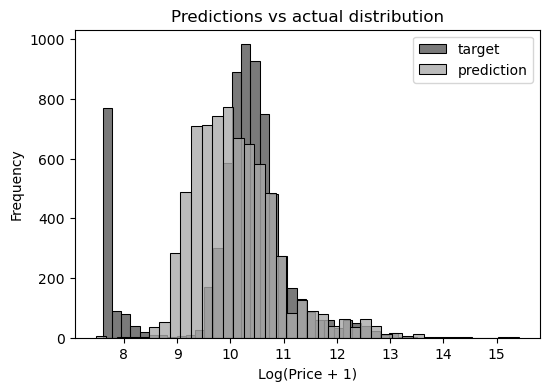

In [121]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [126]:
### Computing RMSE on Validation Data

In [122]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [123]:
rmse(y_train, y_pred)

0.7554192603920132

In [124]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

In [125]:
rmse(y_val, y_pred)

0.7616530991301601

### Feature Engineering

In [146]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [148]:
X_train = prepare_X(df_train)
w_0, w = train_lin_reg(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058335


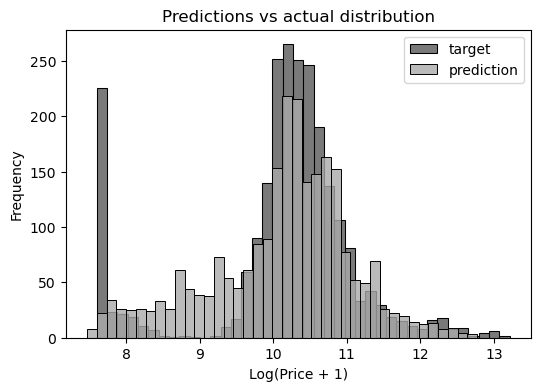

In [149]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Categorical Variables